# Running your workloads remotely

This section explores how to list programs available in Serverless, how to pass inputs into these programs and run them remotely, checking status, and retrieving results + logs.

First, authenticate with Qiskit Serverless with your [IBM Quantum account](https://quantum.ibm.com/account).

In [16]:
from qiskit_serverless import IBMServerlessProvider

# Authenticate to the remote cluster and submit the pattern for remote execution
serverless = IBMServerlessProvider(
    token=API_TOKEN
)

## List programs available

We can use `serverless.list()` to print out a list of the available programs to run with Qiskit Serverless.

In [17]:
serverless.list()

[QiskitFunction(transpile_remote_serverless)]

## Run an uploaded program, and pass inputs

First, let's setup our inputs. Our program has three inputs: `circuits`, `backend`, and `optimization_level`. We can use `random_circuit` to help us create 30 random circuits: 

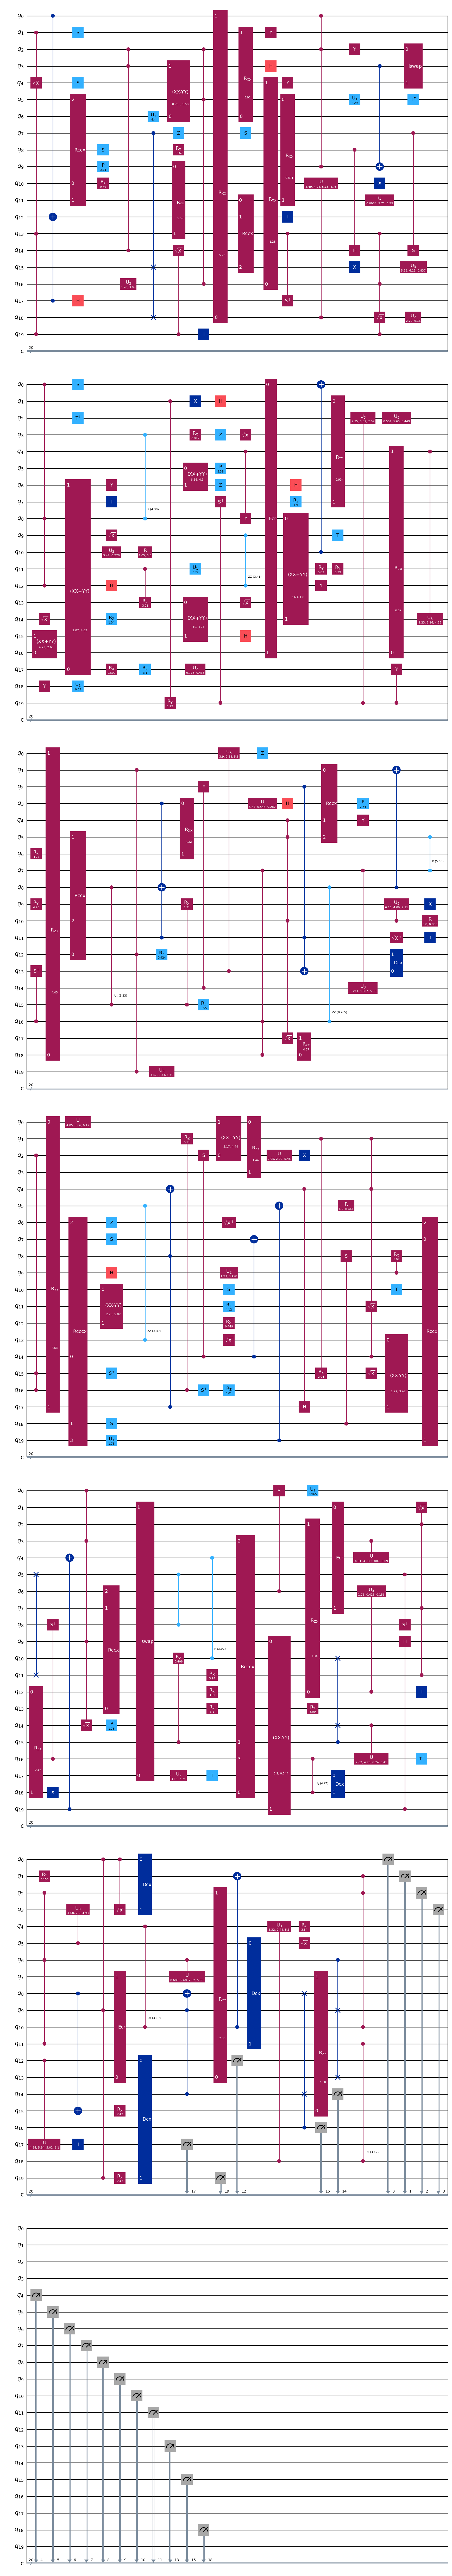

In [7]:
from qiskit.circuit.random import random_circuit

qc_random = [(random_circuit(20, 20, measure=True)) for _ in range(30)]
qc_random[0].draw(output='mpl', idle_wires=False)

Next, we'll use `QiskitRuntimeService` and `least_busy` to select a `backend`:

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel='ibm_quantum', token=API_TOKEN)
backend = service.least_busy(operational=True, simulator=False)
print(backend.name)

ibm_torino


Finally, we can set our optimization level:

In [13]:
optimization_level = 3

We can select our program with `serverless.get('PROGRAM_NAME')`

In [50]:
transpile_remote_serverless = serverless.get('transpile_remote_serverless')

Next, we can pass our inputs and run it in a pythonic fashion as shown below:

In [51]:
job = transpile_remote_serverless.run(
    circuits=qc_random,
    backend=backend.name,
    optimization_level=optimization_level
)

In [52]:
job.job_id

'da8799b2-7e17-4c54-9271-78bbc14c36da'

## Check job status

Using our Qiskit Serverless `job_id`, we can check the status of running jobs. This can include the following statuses: 

- **`QUEUED`**: The remote program is in the Qiskit Serverless queue. This is currently based on how much you've used Qiskit Serverless
- **`INITIALIZING`**: The remote program is starting, this includes setting up the remote environment and installing dependencies
- **`RUNNING`**: The program is running. At this stage, if you have `print()` outputs in your program, you should be able to retrieve logs using `job.logs()`
- **`DONE`**: The program is complete, and you can retrieve data stored `save_result()` with `job.results()`

In [96]:
job.status()

'INITIALIZING'

## Get logs and results

As mentioned before, once a program is `RUNNING`, you can use `job.logs()` to fetch logs created from `print()` outputs:

In [67]:
logs = job.logs()
print(logs)

Once a program is `DONE`, you can use `job.results()` to fetch the result stored in `save_result()`:

In [48]:
result = job.result()
print(result)

{}


## List previously run jobs run with Serverless

You can use `get_jobs()` to list all jobs submitted to Qiskit Serverless:

In [45]:
old_jobs = serverless.get_jobs()
old_jobs

[<Job | f3df7b7a-641a-4bb1-bf95-5d7c0e455d2e>,
 <Job | 79966284-a7c0-41b6-b9c7-9a6cdcfaa3ef>,
 <Job | 0267298e-071d-49b2-a563-5aa014ce372f>,
 <Job | b786209b-4d08-4e15-8103-f79c67332692>,
 <Job | 74e10d95-b1dc-482c-b49f-bb6a1466da1c>]

You've successfully run your first Qiskit Serverless program. Next, we'll explore compute and data management tools available to your program, including parallelization.